In [1]:
# import numpy as np
# from scipy.integrate import quad

# def kappa(xpp):
#     return xpp**2

# def tau(xp):
#     ss,err=quad(kappa,0.0,xp,epsrel=1e-3)
#     return ss

# def emissivity(xp):
#     return np.exp(-xp)

# def f(xp):
#     return emissivity(xp)*np.exp(-tau(xp))

# ss, err=quad(f,0.0,1.0,epsrel=1e-3)

# print('ss=',ss)

ss= 0.5972391681679584


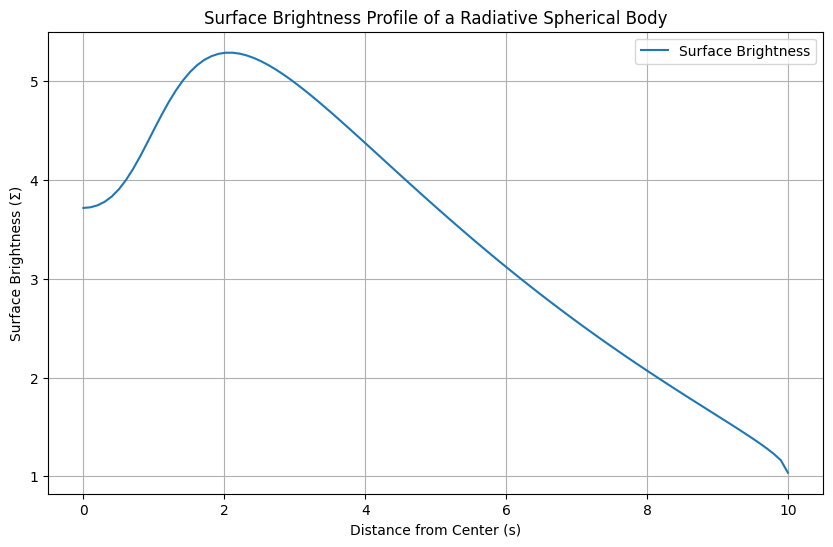

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

R = 10 
r1 = 5
r2 = 1
k0 = 2.5

# 发射率函数
def epsilon(r):
    return np.exp(-r / r1)

# 密度函数
def rho(r):
    return 1 / (1 + (r / r2)**2)

# 光深
def tau(x_prime, s, theta):
    def integrand(x_double_prime):
        r_double_prime = np.sqrt(R**2 + x_double_prime**2 - 2 * R * x_double_prime * np.cos(theta))
        return k0 * rho(r_double_prime)**2
    return quad(integrand, 0, x_prime)[0]

# 面亮度
def surface_brightness(s):
    theta = np.arcsin(s / R)
    
    def integrand(x_prime):
        r_prime = np.sqrt(R**2 + x_prime**2 - 2 * R * x_prime * np.cos(theta))
        return epsilon(r_prime) * np.exp(-tau(x_prime, s, theta))
    
    return quad(integrand, 0, np.sqrt(2 * R**2 - s**2))[0]

s_values = np.linspace(0, R, 100)
sigma_values = [surface_brightness(s) for s in s_values]

plt.figure(figsize=(10, 6))
plt.plot(s_values, sigma_values, label="Surface Brightness")
plt.xlabel('Distance from Center (s)')
plt.ylabel('Surface Brightness (Σ)')
plt.title('Surface Brightness Profile of a Radiative Spherical Body')
plt.legend()
plt.grid(True)
plt.show()
